# BibMon - Biblioteca de Monitoramento de Processos

# Grupo EngePol

Neste notebook, é demonstrada a aplicação de técnicas de monitoramento, utilizando dados do benchmark Tennessee Eastman Process.

In [1]:
%load_ext autoreload
%autoreload 2

from datetime import datetime
import pandas as pd
import bibmon

import matplotlib.pyplot as plt
plt.style.use('default')

## Descrição do processo

<img src="https://raw.githubusercontent.com/gmxavier/TEP-meets-LSTM/master/tep_flowsheet.png" width="900" height="900"/>

### Variáveis manipuladas

Variable | Description
-------- | -----------
`XMV(1)`  | D Feed Flow (stream 2)            (Corrected Order)
`XMV(2)`  | E Feed Flow (stream 3)            (Corrected Order)
`XMV(3)`  | A Feed Flow (stream 1)            (Corrected Order)
`XMV(4)`  | A and C Feed Flow (stream 4)
`XMV(5)`  | Compressor Recycle Valve
`XMV(6)`  | Purge Valve (stream 9)
`XMV(7)`  | Separator Pot Liquid Flow (stream 10)
`XMV(8)`  | Stripper Liquid Product Flow (stream 11)
`XMV(9)`  | Stripper Steam Valve
`XMV(10)` | Reactor Cooling Water Flow
`XMV(11)` | Condenser Cooling Water Flow
`XMV(12)` | Agitator Speed

### Medições de processo contínuas

Variable | Description | unit
-------- | ----------- | ----
`XMEAS(1)`  | A Feed  (stream 1)                  | kscmh
`XMEAS(2)`  | D Feed  (stream 2)                  | kg/hr
`XMEAS(3)`  | E Feed  (stream 3)                  | kg/hr
`XMEAS(4)`  | A and C Feed  (stream 4)            | kscmh
`XMEAS(5)`  | Recycle Flow  (stream 8)            | kscmh
`XMEAS(6)`  | Reactor Feed Rate  (stream 6)       | kscmh
`XMEAS(7)`  | Reactor Pressure                    | kPa gauge
`XMEAS(8)`  | Reactor Level                       | %
`XMEAS(9)`  | Reactor Temperature                 | Deg C
`XMEAS(10)` | Purge Rate (stream 9)               | kscmh
`XMEAS(11)` | Product Sep Temp                    | Deg C
`XMEAS(12)` | Product Sep Level                   | %
`XMEAS(13)` | Prod Sep Pressure                   | kPa gauge
`XMEAS(14)` | Prod Sep Underflow (stream 10)      | m3/hr
`XMEAS(15)` | Stripper Level                      | %
`XMEAS(16)` | Stripper Pressure                   | kPa gauge
`XMEAS(17)` | Stripper Underflow (stream 11)      | m3/hr
`XMEAS(18)` | Stripper Temperature                | Deg C
`XMEAS(19)` | Stripper Steam Flow                 | kg/hr
`XMEAS(20)` | Compressor Work                     | kW
`XMEAS(21)` | Reactor Cooling Water Outlet Temp   | Deg C
`XMEAS(22)` | Separator Cooling Water Outlet Temp | Deg C

### Medições de processo amostradas

- Reactor Feed Analysis (Stream 6)
  > - Sampling Frequency = 0.1 hr
  > - Dead Time = 0.1 hr
  > - Mole %
  
Variable | Description
-------- | -----------
`XMEAS(23)` | Component A
`XMEAS(24)` | Component B
`XMEAS(25)` | Component C
`XMEAS(26)` | Component D
`XMEAS(27)` | Component E
`XMEAS(28)` | Component F

- Purge Gas Analysis (Stream 9)
  > - Sampling Frequency = 0.1 hr
  > - Dead Time = 0.1 hr
  > - Mole %

Variable | Description
-------- | -----------
`XMEAS(29)` | Component A
`XMEAS(30)` | Component B
`XMEAS(31)` | Component C
`XMEAS(32)` | Component D
`XMEAS(33)` | Component E
`XMEAS(34)` | Component F
`XMEAS(35)` | Component G
`XMEAS(36)` | Component H

- Product Analysis (Stream 11)
  > - Sampling Frequency = 0.25 hr
  > - Dead Time = 0.25 hr
  > - Mole %

Variable | Description
-------- | -----------
`XMEAS(37)` | Component D
`XMEAS(38)` | Component E
`XMEAS(39)` | Component F
`XMEAS(40)` | Component G
`XMEAS(41)` | Component H

### Perturbações de processo

Variable | Description
-------- | -----------
`IDV(1)`  | A/C Feed Ratio, B Composition Constant (Stream 4)          Step
`IDV(2)`  | B Composition, A/C Ratio Constant (Stream 4)               Step
`IDV(3)`  | D Feed Temperature (Stream 2)                              Step
`IDV(4)`  | Reactor Cooling Water Inlet Temperature                    Step
`IDV(5)`  | Condenser Cooling Water Inlet Temperature                  Step
`IDV(6)`  | A Feed Loss (Stream 1)                                     Step
`IDV(7)`  | C Header Pressure Loss - Reduced Availability (Stream 4)   Step
`IDV(8)`  | A, B, C Feed Composition (Stream 4)            Random Variation
`IDV(9)`  | D Feed Temperature (Stream 2)                  Random Variation
`IDV(10)` | C Feed Temperature (Stream 4)                  Random Variation
`IDV(11)` | Reactor Cooling Water Inlet Temperature        Random Variation
`IDV(12)` | Condenser Cooling Water Inlet Temperature      Random Variation
`IDV(13)` | Reaction Kinetics                                    Slow Drift
`IDV(14)` | Reactor Cooling Water Valve                            Sticking
`IDV(15)` | Condenser Cooling Water Valve                          Sticking
`IDV(16)` | Unknown
`IDV(17)` | Unknown
`IDV(18)` | Unknown
`IDV(19)` | Unknown
`IDV(20)` | Unknown

## Importando dados

In [2]:
df_treino, df_teste = bibmon.carregar_tennessee_eastman(idv_tr = 0, idv_ts = 1)

Inspecionando os DataFrames:

* Treino:

In [3]:
display(df_treino)
display(df_treino.describe())

,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
2020-01-01 00:00:00,0.24987,3642.6,4539.6,9.2784,27.200,42.248,2704.2,75.492,120.40,0.33990,...,53.617,24.708,62.265,22.224,39.724,41.975,50.223,47.411,41.093,18.351
2020-01-01 00:03:00,0.25118,3694.8,4513.8,9.2831,27.077,42.736,2705.4,74.628,120.41,0.33560,...,53.926,24.579,61.306,21.975,40.249,34.187,44.741,47.442,41.303,19.831
2020-01-01 00:06:00,0.25185,3683.5,4504.9,9.4600,26.987,42.245,2705.2,74.315,120.42,0.33761,...,54.032,24.521,60.532,21.640,40.003,43.628,46.032,47.574,41.520,20.426
2020-01-01 00:09:00,0.25147,3653.9,4531.9,9.3462,26.983,42.656,2706.3,75.487,120.39,0.33631,...,53.708,24.558,61.496,22.324,40.161,37.967,43.903,47.606,41.284,19.568
2020-01-01 00:12:00,0.24107,3629.3,4527.0,9.3406,27.041,42.520,2705.6,75.332,120.38,0.34839,...,53.259,24.024,60.781,22.506,40.962,34.247,48.037,47.585,40.949,17.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-02 00:45:00,0.23538,3630.1,4496.9,9.3117,26.682,42.619,2693.0,75.171,120.37,0.34563,...,54.039,23.277,60.553,21.372,40.348,29.977,49.871,48.455,40.573,19.165
2020-01-02 00:48:00,0.27740,3625.1,4507.9,9.2752,26.973,42.169,2693.4,74.323,120.40,0.33844,...,53.406,27.673,61.780,21.571,40.725,37.446,48.169,48.568,41.062,19.514
2020-01-02 00:51:00,0.27880,3644.7,4496.9,9.3317,27.017,42.502,2694.9,74.332,120.42,0.33804,...,53.538,27.535,59.927,21.927,40.773,37.808,45.359,48.664,41.168,18.299
2020-01-02 00:54:00,0.25025,3724.3,4505.9,9.4269,26.724,42.652,2696.7,74.266,120.43,0.31239,...,54.505,24.729,61.826,21.582,37.558,41.747,43.807,48.966,42.048,16.825


,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.251138,3663.537800,4511.517200,9.344306,26.907786,42.338706,2705.397400,74.984724,120.399440,0.337592,...,54.005688,24.721266,61.322378,22.252254,40.081820,38.287544,46.513164,47.461154,41.094750,18.215882
std,0.028551,32.031586,31.724556,0.076514,0.208664,0.220975,5.263385,0.528206,0.018654,0.011688,...,0.427750,2.825117,1.185301,0.413688,1.438028,3.043152,2.355013,2.123041,0.525558,1.488055
min,0.180820,3559.500000,4419.800000,9.128600,26.280000,41.659000,2690.500000,73.617000,120.350000,0.305090,...,52.779000,17.781000,57.903000,20.765000,35.477000,29.977000,39.504000,42.162000,39.510000,14.009000
25%,0.230590,3643.050000,4488.575000,9.293000,26.776000,42.173750,2702.900000,74.633750,120.390000,0.329445,...,53.719500,22.780500,60.493000,21.999500,39.024500,36.071250,45.007250,45.748250,40.785750,17.186250
50%,0.250245,3663.650000,4512.300000,9.343450,26.899500,42.353500,2705.900000,74.979500,120.400000,0.337140,...,54.029500,24.606500,61.296500,22.280500,40.077500,38.216000,46.568000,47.536500,41.064500,18.222000
75%,0.269275,3684.625000,4534.700000,9.395350,27.048000,42.486000,2709.500000,75.337000,120.410000,0.345668,...,54.276500,26.533750,62.112500,22.529500,41.125750,40.390750,48.176250,49.149000,41.440250,19.166250
max,0.342850,3754.700000,4600.700000,9.592800,27.529000,42.925000,2715.800000,76.750000,120.450000,0.370080,...,55.111000,33.682000,65.323000,23.313000,44.575000,47.453000,53.152000,52.124000,42.641000,23.144000


* Teste:

In [4]:
display(df_teste)
display(df_teste.describe())

,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
2020-02-01 00:00:00,0.25025,3657.2,4520.1,9.3965,26.715,42.191,2704.5,74.593,120.42,0.33701,...,53.850,24.670,61.839,22.101,40.078,33.041,48.969,47.459,41.841,18.049
2020-02-01 00:03:00,0.25135,3662.1,4532.3,9.4020,26.644,42.812,2704.9,75.044,120.39,0.33723,...,53.705,24.562,61.348,22.264,40.050,39.154,49.870,47.403,41.188,18.008
2020-02-01 00:06:00,0.25045,3681.9,4493.6,9.2395,26.971,42.282,2705.0,75.405,120.42,0.33643,...,54.167,24.659,61.826,22.312,40.147,39.294,44.511,47.265,41.290,18.009
2020-02-01 00:09:00,0.25056,3667.9,4466.0,9.3602,26.937,42.194,2705.9,75.397,120.41,0.33891,...,54.498,24.648,63.168,22.288,39.845,36.334,46.168,47.410,40.997,17.771
2020-02-01 00:12:00,0.28659,3693.0,4502.5,9.5652,26.999,42.540,2704.3,74.749,120.39,0.34173,...,54.142,28.430,57.566,22.142,40.806,34.882,45.576,47.424,41.290,19.371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-02 23:45:00,0.75426,3656.7,4536.1,8.8068,26.724,42.227,2700.9,74.242,120.39,0.28932,...,53.348,74.398,56.728,22.327,34.240,37.948,45.863,63.912,40.938,16.964
2020-02-02 23:48:00,0.75962,3650.0,4459.2,8.8456,27.054,42.361,2701.4,75.182,120.41,0.29400,...,54.261,75.030,58.422,22.548,34.863,38.509,44.698,64.087,42.010,16.724
2020-02-02 23:51:00,0.75920,3625.5,4501.2,8.8241,26.976,42.511,2704.0,75.614,120.40,0.29359,...,53.758,75.071,57.035,22.941,34.912,36.447,42.824,64.318,40.789,17.699
2020-02-02 23:54:00,0.78204,3634.0,4508.1,8.8987,27.286,42.300,2702.0,74.805,120.39,0.33121,...,54.191,77.323,57.030,22.481,39.768,30.297,44.762,64.357,41.169,19.572


,XMEAS(1),XMEAS(2),XMEAS(3),XMEAS(4),XMEAS(5),XMEAS(6),XMEAS(7),XMEAS(8),XMEAS(9),XMEAS(10),...,XMV(2),XMV(3),XMV(4),XMV(5),XMV(6),XMV(7),XMV(8),XMV(9),XMV(10),XMV(11)
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,0.674955,3655.144688,4493.088021,8.891162,26.897168,42.294267,2709.805208,75.064707,120.400292,0.320791,...,53.774363,66.392989,58.245068,22.228254,38.160640,38.043082,46.433756,59.621876,41.027898,18.108770
std,0.209905,34.632029,63.453774,0.282795,0.206364,0.237461,25.501441,0.947238,0.018866,0.020530,...,0.758921,20.636931,2.160748,1.362974,2.485338,2.877032,2.322713,11.998833,0.680549,1.463344
min,0.180200,3523.100000,4216.100000,8.074400,26.216000,41.628000,2652.000000,71.447000,120.340000,0.238750,...,50.837000,17.512000,51.932000,18.157000,28.398000,30.297000,39.729000,46.346000,38.303000,13.369000
25%,0.682792,3632.950000,4459.075000,8.726375,26.760000,42.133750,2698.375000,74.518500,120.390000,0.310048,...,53.347250,67.166250,56.812250,21.631000,36.850250,36.113000,44.796750,51.647750,40.609750,17.088750
50%,0.751200,3655.600000,4499.000000,8.837550,26.895500,42.293500,2705.000000,75.005500,120.400000,0.320440,...,53.835000,73.942000,58.013500,22.166500,38.135500,37.973500,46.418000,58.280000,41.025000,18.103500
75%,0.788720,3678.300000,4531.625000,9.026625,27.039000,42.448250,2714.125000,75.553250,120.410000,0.332025,...,54.253500,77.691250,59.662500,22.736750,39.516000,40.041000,48.124250,60.989000,41.467000,19.163500
max,0.999310,3759.700000,4710.000000,9.565200,27.539000,43.105000,2820.500000,78.840000,120.470000,0.400550,...,56.289000,98.531000,64.990000,26.903000,46.347000,46.682000,52.774000,100.200000,43.295000,22.236000


In [5]:
# inicio da falha
falha_inicio = '2020-02-01 08:00:00'

## Modelagem e monitoramento

Definindo o modelo:

In [6]:
modelo = bibmon.Autoencoder()#bibmon.PCA()
param_dict = {'hidden_layer_sizes': (50),'max_iter':1000}
modelo.setar_hiperparametros(param_dict)

Definindo as funções de pré-processamento de dados:

In [7]:
preproc = ['normalizar']

Treinando o modelo:

In [8]:
modelo.fit(df_treino, f_pp = preproc, redefine_lim = True, frac_val = 0.1)

Deve-se ressaltar que também é possível fazer uma redefinição do limite em um período de teste com dados normais em separado do treinamento, utilizando no método **predict** o mesmo parâmetro **redefine_lim**.


Testando o modelo (período com falha):

In [9]:
modelo.predict(df_teste)

Observando a carta de SPE do teste:

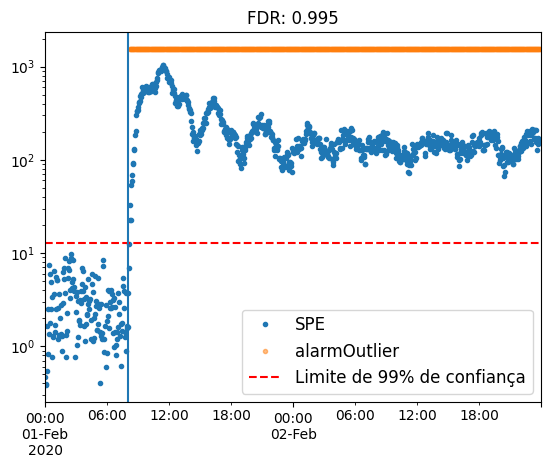

In [10]:
modelo.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo.alarmOutlier[falha_inicio:].mean()}');

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (960).

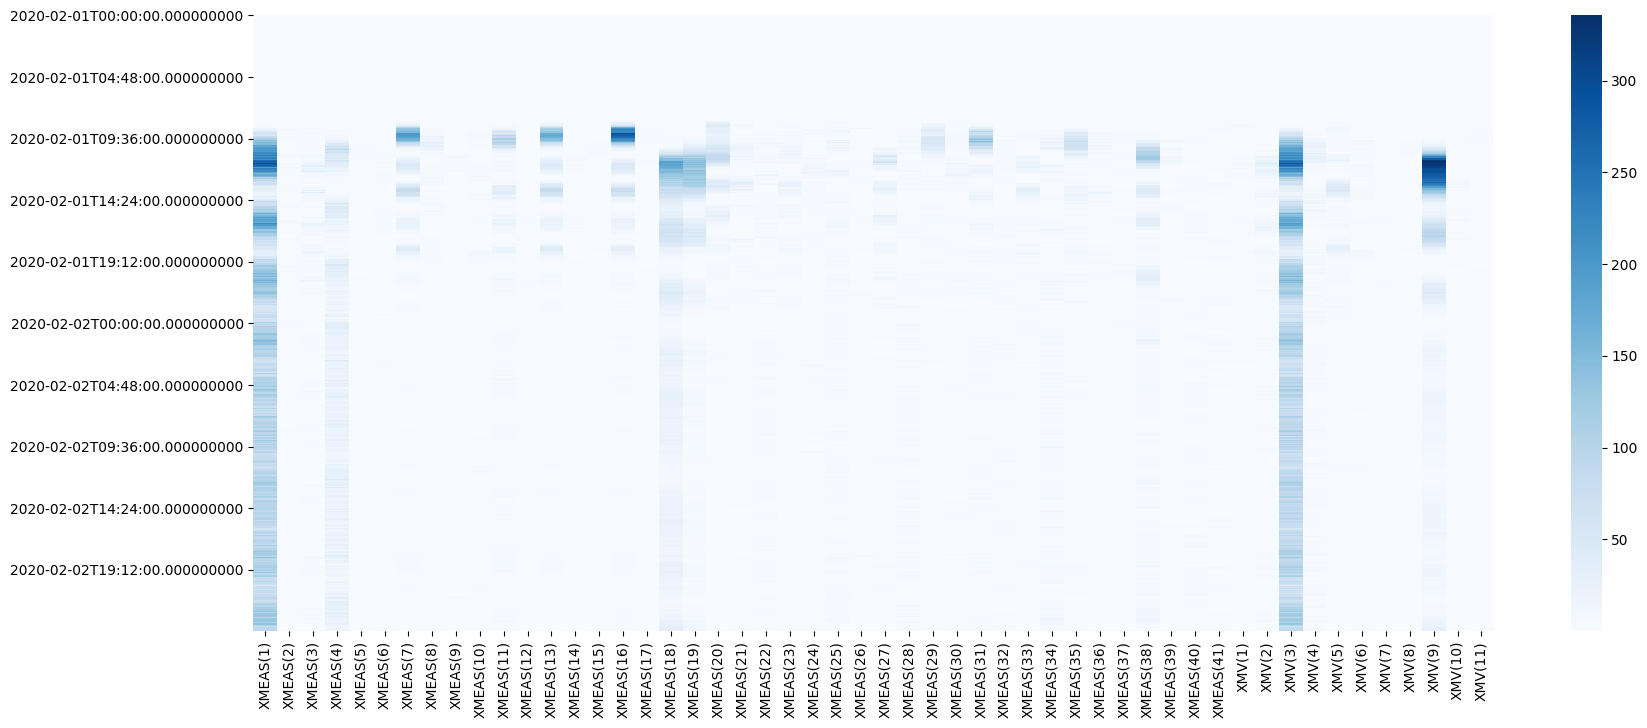

In [11]:
modelo.plot_PD()
plt.gca().axhline(y=modelo.X_teste.index.get_loc(falha_inicio),ls='--');

## Analisando o efeito de técnicas de pré-processamento

Na BibMon, aplicar técnicas de pré-processamento é simples: basta definir listas com os nomes das funções, em ordem de aplicação, e fornecê-las aos métodos **fit** e **predict**.

Na Tennessee Eastman, em particular, a taxa de detecção de falhas do caso IDV-11 se beneficia da aplicação de técnicas de filtração de ruído e adição de dinâmica via lags.

In [12]:
# importando dados
df_treino, df_teste = bibmon.carregar_tennessee_eastman(idv_tr = 0, idv_ts = 11)

* Usando apenas padronização:

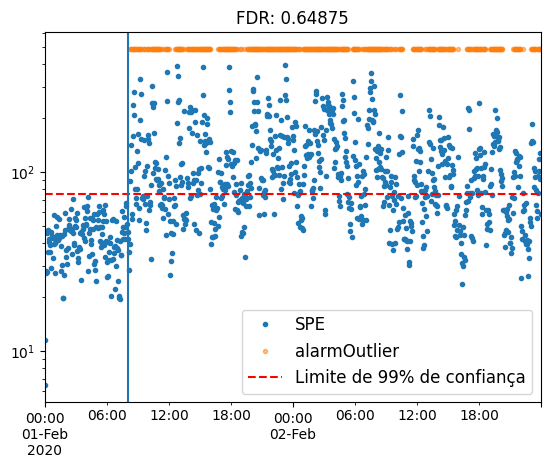

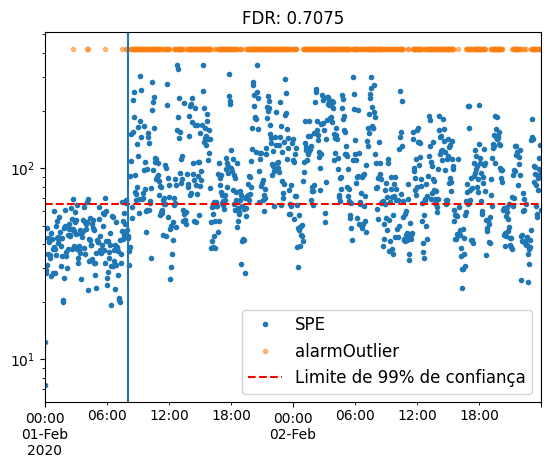

In [26]:
#modelo = bibmon.PCA()
modelo = bibmon.Autoencoder()
param_dict = {'hidden_layer_sizes': (5),'max_iter':1000}
modelo.setar_hiperparametros(param_dict)

modelo2 = bibmon.Autoencoder()
param_dict2 = {'hidden_layer_sizes': (10,5,10),'max_iter':1000}
modelo2.setar_hiperparametros(param_dict2)

preproc = ['normalizar']

modelo.fit(df_treino, f_pp = preproc, redefine_lim = True, frac_val = 0.1)
modelo2.fit(df_treino, f_pp = preproc, redefine_lim = True, frac_val = 0.1)
modelo.predict(df_teste)
modelo2.predict(df_teste)
modelo.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo.alarmOutlier[falha_inicio:].mean()}');
modelo2.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo2.alarmOutlier[falha_inicio:].mean()}');

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (960).

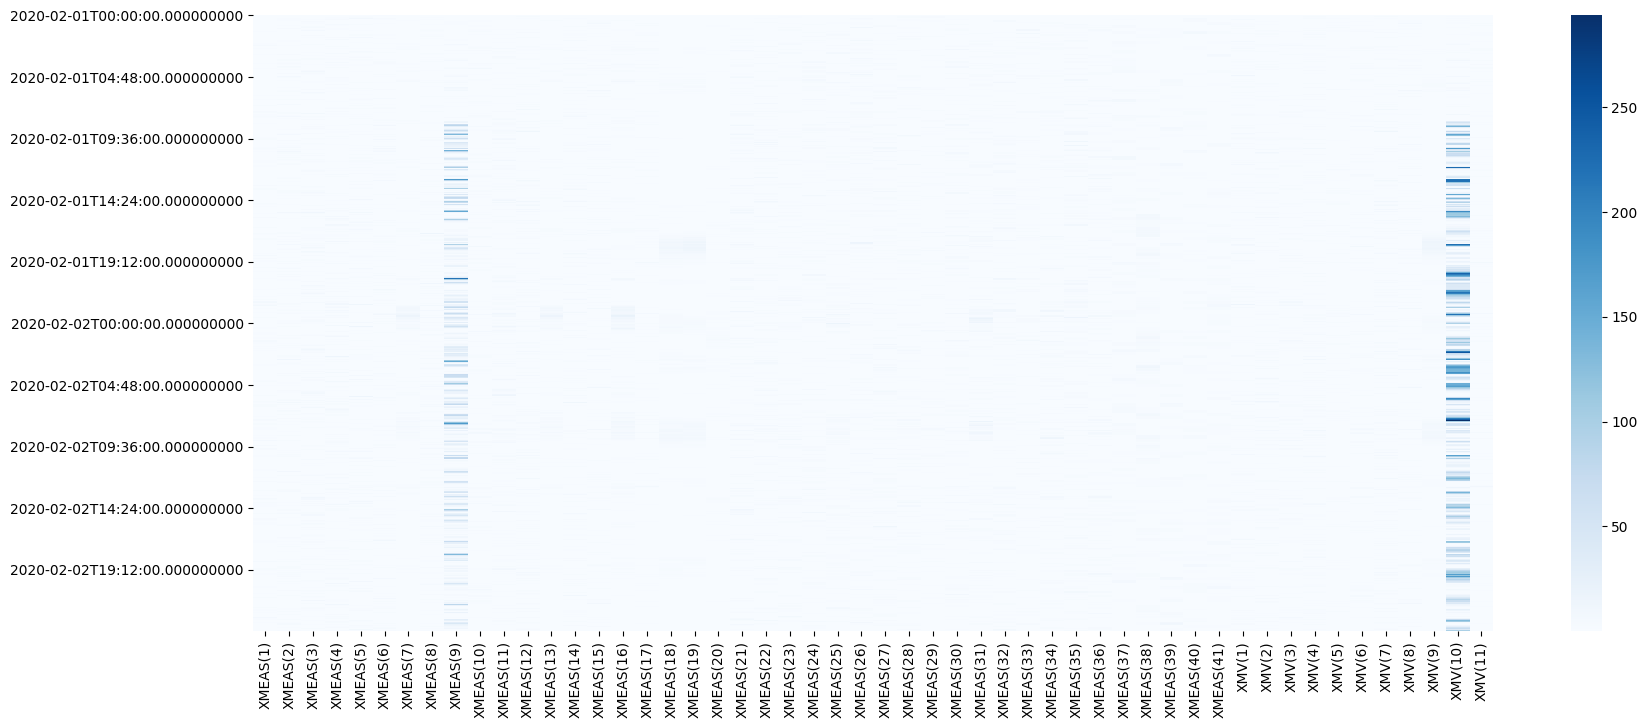

In [27]:
modelo.plot_PD()
plt.gca().axhline(y=modelo.X_teste.index.get_loc(falha_inicio),ls='--');

* Aplicando lag:

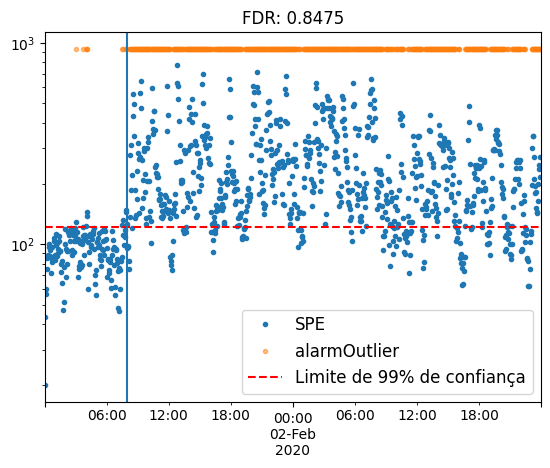

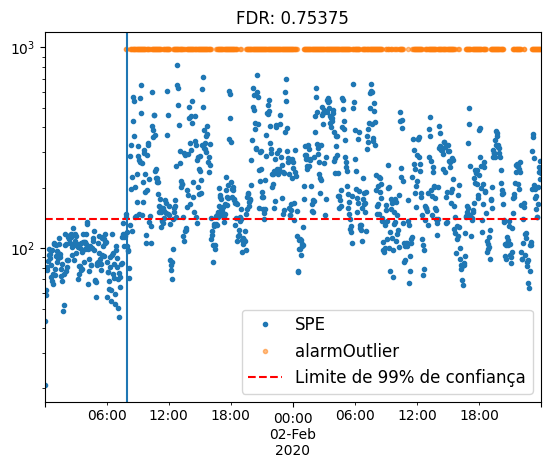

In [31]:
model = bibmon.Autoencoder()
param_dict = {'hidden_layer_sizes': (5),'max_iter':1000}
modelo.setar_hiperparametros(param_dict)

modelo2 = bibmon.Autoencoder()
param_dict2 = {'hidden_layer_sizes': (10,5,10),'max_iter':1000}
modelo2.setar_hiperparametros(param_dict2)

preproc = ['aplicar_lag', 'normalizar']

#Fit models
modelo.fit(df_treino, f_pp = preproc, redefine_lim = True, frac_val = 0.1)
modelo2.fit(df_treino, f_pp = preproc, redefine_lim = True, frac_val = 0.1)

#Fazer predições
modelo.predict(df_teste)
modelo2.predict(df_teste)

#plotar resultados autoencoder simples
modelo.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo.alarmOutlier[falha_inicio:].mean()}');

#plotar resultados deep autoencoder 
modelo2.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo2.alarmOutlier[falha_inicio:].mean()}');

# Comparação
Gerar tabela para algumas falhas
 PCA vs Autoencoder

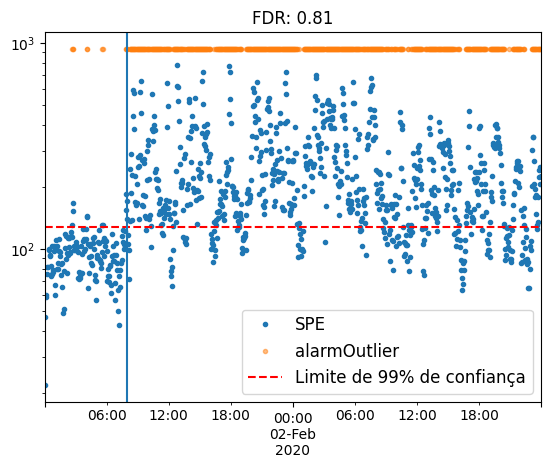

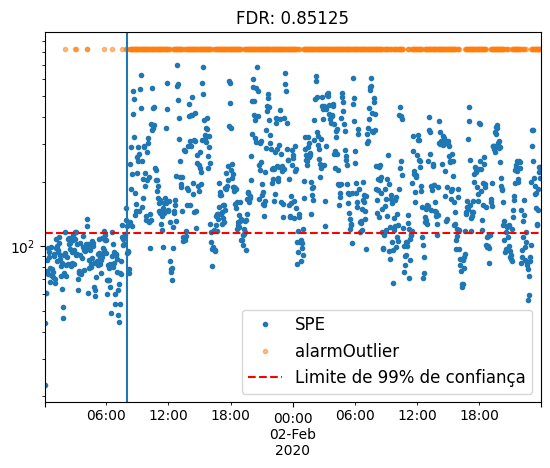

In [32]:
modelo = bibmon.Autoencoder()
param_dict = {'hidden_layer_sizes': (5),'max_iter':1000}
modelo.setar_hiperparametros(param_dict)

modelo2 = bibmon.Autoencoder()
param_dict2 = {'hidden_layer_sizes': (10,5,10),'max_iter':1000}
modelo2.setar_hiperparametros(param_dict2)

preproc = ['aplicar_lag', 'normalizar']

modelo.fit(df_treino, f_pp = preproc, redefine_lim = True, frac_val = 0.1)
modelo2.fit(df_treino, f_pp = preproc, redefine_lim = True, frac_val = 0.1)

modelo.predict(df_teste)
modelo2.predict(df_teste)

modelo.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo.alarmOutlier[falha_inicio:].mean()}');
modelo2.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo2.alarmOutlier[falha_inicio:].mean()}');

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (959).

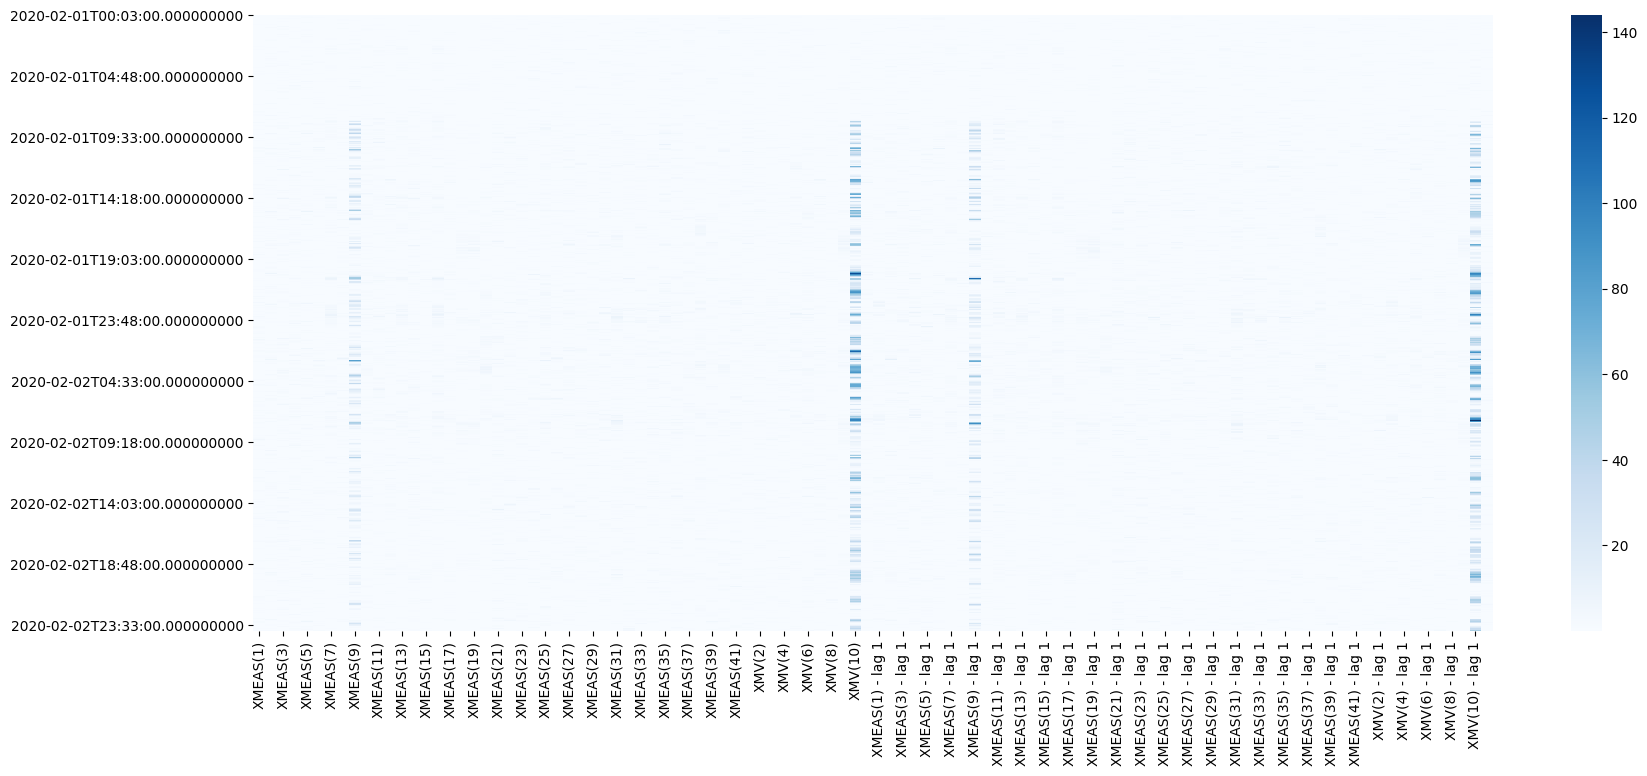

In [17]:
modelo.plot_PD()
plt.gca().axhline(y=modelo.X_teste.index.get_loc(falha_inicio),ls='--');

* Aplicando filtro:

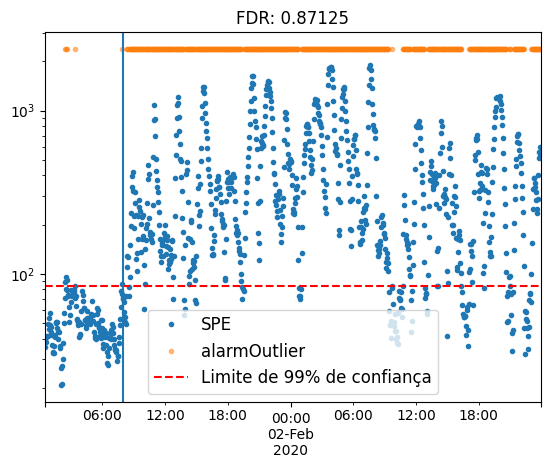

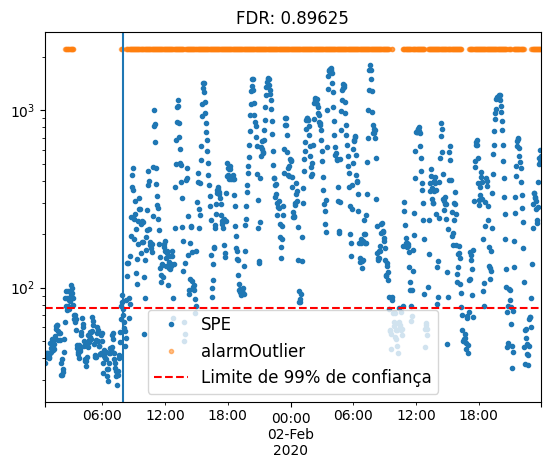

In [34]:
modelo = bibmon.Autoencoder()
param_dict = {'hidden_layer_sizes': (5),'max_iter':1000}
modelo.setar_hiperparametros(param_dict)

modelo2 = bibmon.Autoencoder()
param_dict2 = {'hidden_layer_sizes': (10,5,10),'max_iter':1000}
modelo2.setar_hiperparametros(param_dict2)

preproc = ['filtro_media_movel', 'normalizar']

modelo.fit(df_treino, f_pp = preproc, redefine_lim = True, frac_val = 0.1)
modelo2.fit(df_treino, f_pp = preproc, redefine_lim = True, frac_val = 0.1)

modelo.predict(df_teste)
modelo2.predict(df_teste)

modelo.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo.alarmOutlier[falha_inicio:].mean()}');
modelo2.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo2.alarmOutlier[falha_inicio:].mean()}');

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (950).

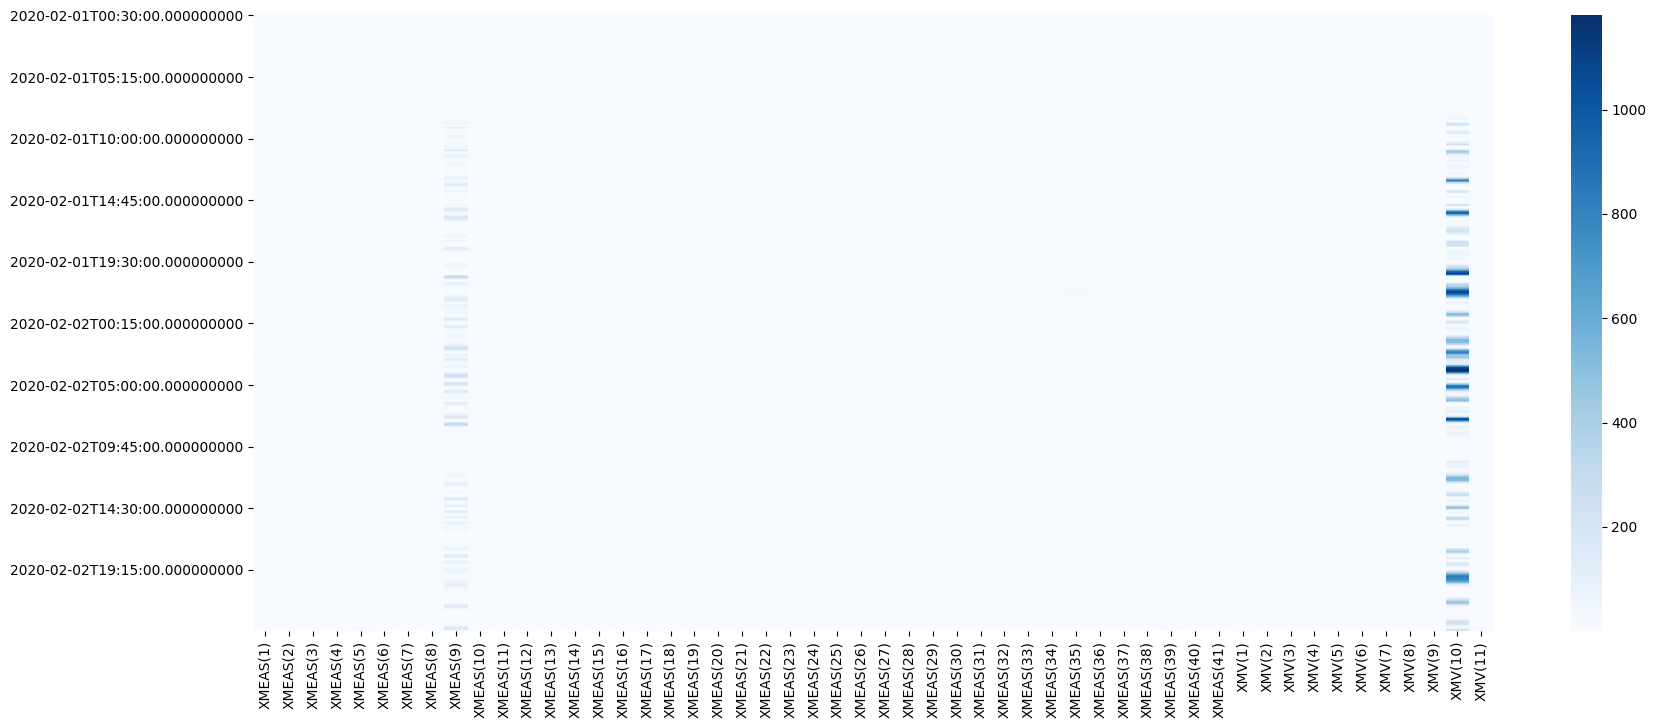

In [19]:
modelo.plot_PD()
plt.gca().axhline(y=modelo.X_teste.index.get_loc(falha_inicio),ls='--');

* Aplicando filtro e lag, modificando os parâmetros por meio do uso do argumento **args_preproc**:

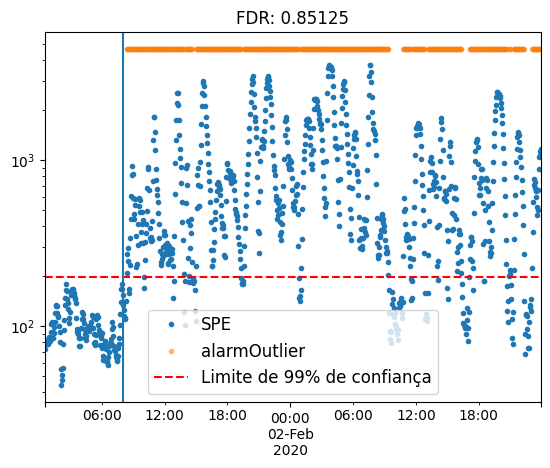

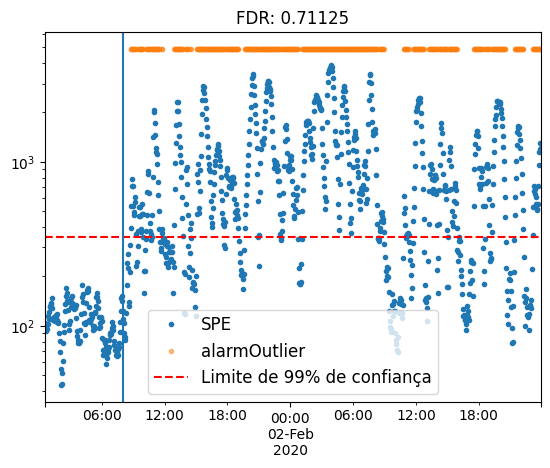

In [35]:
modelo = bibmon.Autoencoder()
param_dict = {'hidden_layer_sizes': (5),'max_iter':1000}
modelo.setar_hiperparametros(param_dict)

modelo2 = bibmon.Autoencoder()
param_dict2 = {'hidden_layer_sizes': (10,5,10),'max_iter':1000}
modelo2.setar_hiperparametros(param_dict2)

preproc = ['aplicar_lag', 'filtro_media_movel', 'normalizar']
args_preproc = {'filtro_media_movel__WS':5, 'aplicar_lag__lag':5}

modelo.fit(df_treino, f_pp = preproc, a_pp = args_preproc,
           redefine_lim = True, frac_val = 0.1)
modelo2.fit(df_treino, f_pp = preproc, a_pp = args_preproc,
           redefine_lim = True, frac_val = 0.1)

modelo.predict(df_teste)
modelo2.predict(df_teste)

modelo.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo.alarmOutlier[falha_inicio:].mean()}');
modelo2.plot_SPE(treino_ou_teste = 'teste')
plt.gca().axvline(falha_inicio);
plt.title(f'FDR: {modelo2.alarmOutlier[falha_inicio:].mean()}');

ValueError: The number of FixedLocator locations (11), usually from a call to set_ticks, does not match the number of ticklabels (949).

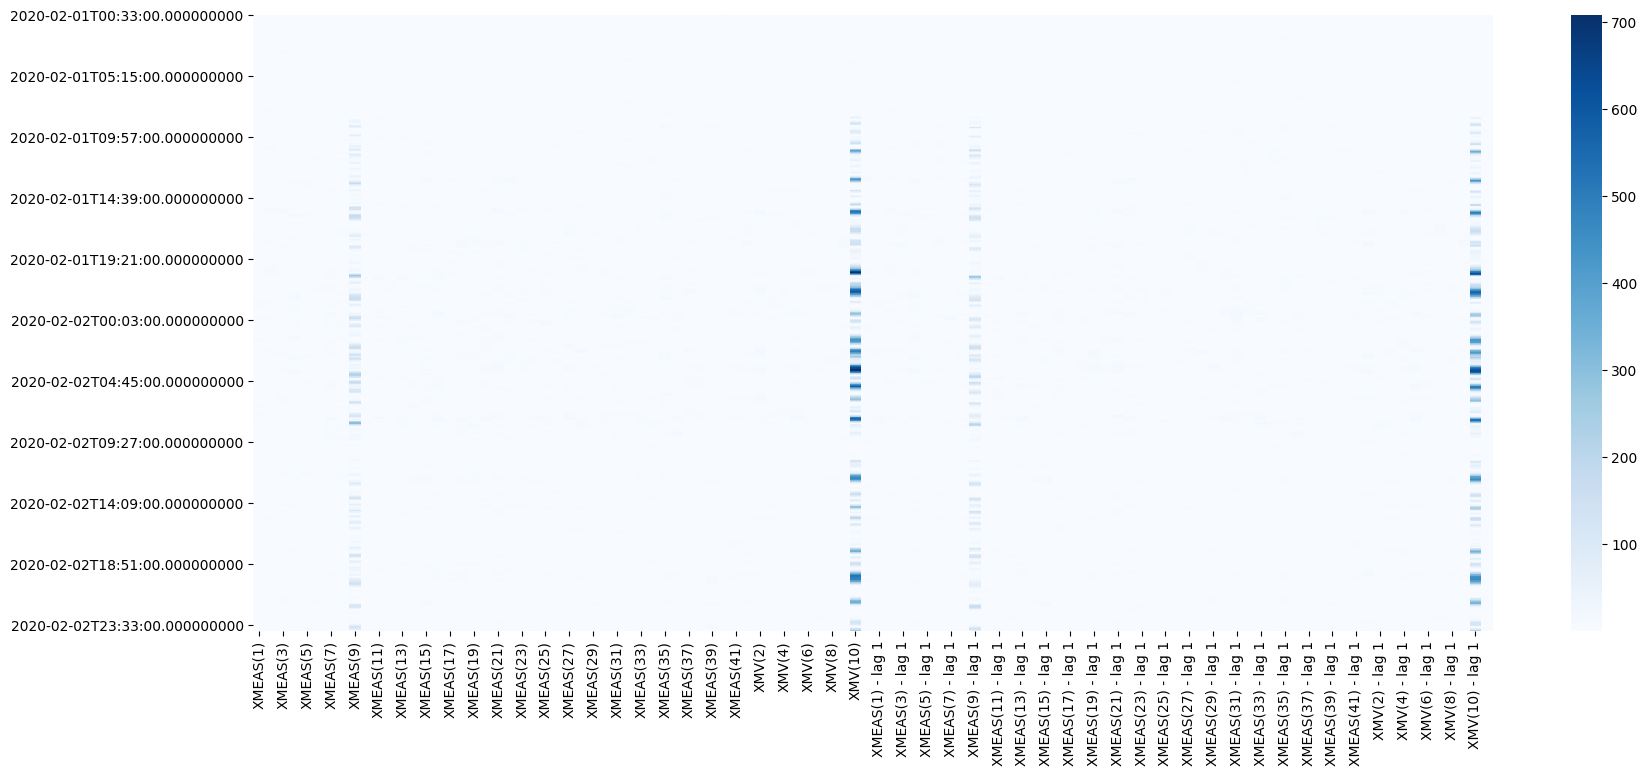

In [22]:
modelo.plot_PD()
plt.gca().axhline(y=modelo.X_teste.index.get_loc(falha_inicio),ls='--');